<a href="https://colab.research.google.com/github/shernee/04_cmpe258/blob/master/Regularizations_%5Ba_b_c_d_f_g%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regularization tasks on 'cifar100' dataset
(https://keras.io/api/datasets/cifar100/)

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
# Read dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')

169001437/169001437 [==============================] - 4s 0us/step


In [ ]:
# Split training into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, shuffle=True)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((42500, 32, 32, 3), (7500, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
# Normalize pixels

X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

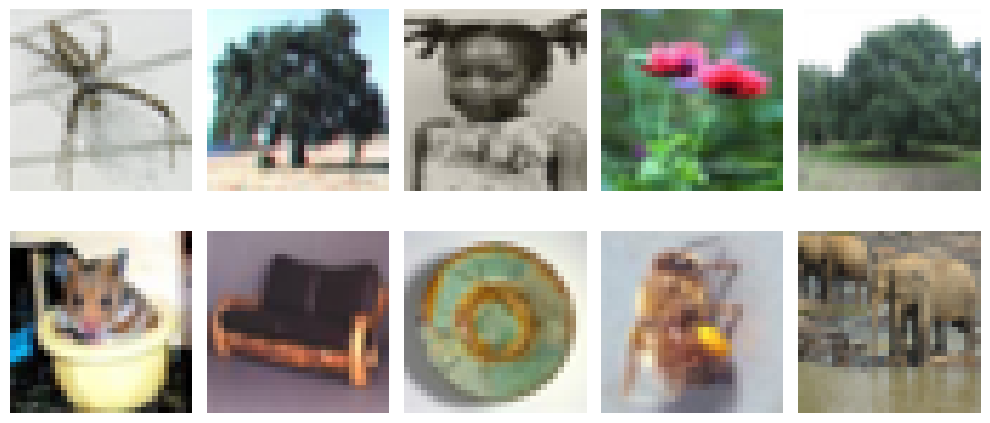

In [ ]:
# Training images

num_images = 10

# Plot the images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in zip(range(num_images), axes.ravel()):
  ax.imshow(X_train[i])
  ax.axis('off')
plt.tight_layout()
plt.show()

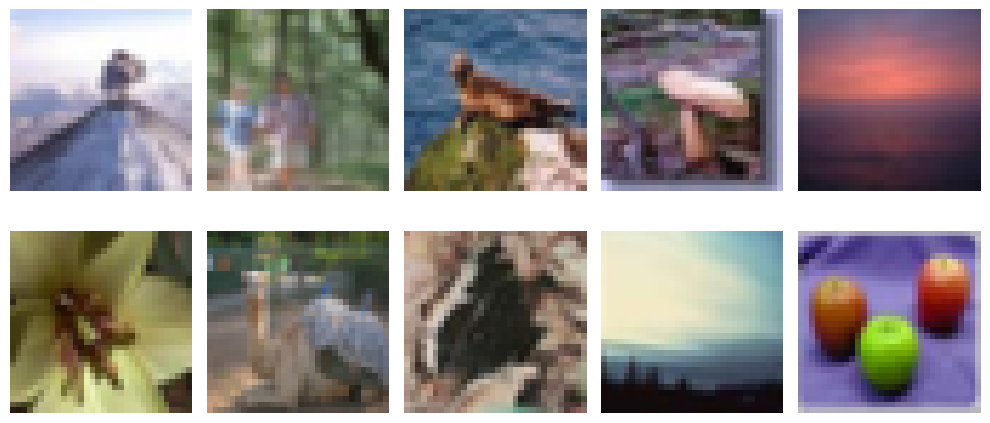

In [ ]:
# Test images

num_images = 10

# Plot the images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in zip(range(num_images), axes.ravel()):
  ax.imshow(X_test[i])
  ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
num_epochs = 30
batch_size = 32

In [ ]:
# One hot encode test labels
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=20)

### Base model (without regularization)

In [ ]:
# Model without regularization

model_ = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_ = model_.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), batch_size=batch_size)

Epoch 1/30
1329/1329 [==============================] - 19s 6ms/step - loss: 2.5275 - accuracy: 0.2124 - val_loss: 2.2182 - val_accuracy: 0.3021
Epoch 2/30
1329/1329 [==============================] - 7s 6ms/step - loss: 2.1169 - accuracy: 0.3419 - val_loss: 1.9930 - val_accuracy: 0.3809
Epoch 3/30
1329/1329 [==============================] - 8s 6ms/step - loss: 1.8804 - accuracy: 0.4131 - val_loss: 1.8758 - val_accuracy: 0.4192
Epoch 4/30
1329/1329 [==============================] - 7s 5ms/step - loss: 1.7034 - accuracy: 0.4656 - val_loss: 1.7905 - val_accuracy: 0.4440
Epoch 5/30
1329/1329 [==============================] - 7s 5ms/step - loss: 1.5428 - accuracy: 0.5142 - val_loss: 1.7222 - val_accuracy: 0.4683
Epoch 6/30
1329/1329 [==============================] - 7s 5ms/step - loss: 1.4018 - accuracy: 0.5536 - val_loss: 1.7597 - val_accuracy: 0.4717
Epoch 7/30
1329/1329 [==============================] - 9s 7ms/step - loss: 1.2667 - accuracy: 0.5960 - val_loss: 1.6997 - val_accuracy

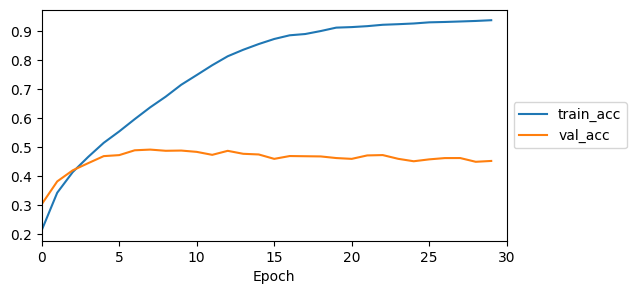

In [ ]:
pd.DataFrame(history_.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# Evaluate model on test set

y_pred_ = model_.predict(X_test)
y_pred_ = np.argmax(y_pred_, axis=1)
acc_ = tf.keras.metrics.Accuracy()(y_test, y_pred_).numpy()
print('Base model accuracy:', acc_)

313/313 [==============================] - 1s 3ms/step
Base model accuracy: 0.4576


Without regularization, the vaidation accuracy starts reducing (the difference between training and validation accuracy widens) after some epochs showing that the network is not generalizing well to unseen data (overfitting).  

### L1 L2 regularization

In [ ]:
model_l1l2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.Dense(100, activation='relu', ),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_l1l2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_l1l2 = model_l1l2.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), batch_size=batch_size)

Epoch 1/30
1329/1329 [==============================] - 15s 8ms/step - loss: 3.1083 - accuracy: 0.1428 - val_loss: 2.7307 - val_accuracy: 0.1739
Epoch 2/30
1329/1329 [==============================] - 9s 7ms/step - loss: 2.6048 - accuracy: 0.2131 - val_loss: 2.5423 - val_accuracy: 0.2356
Epoch 3/30
1329/1329 [==============================] - 8s 6ms/step - loss: 2.4855 - accuracy: 0.2553 - val_loss: 2.4158 - val_accuracy: 0.2807
Epoch 4/30
1329/1329 [==============================] - 7s 5ms/step - loss: 2.3825 - accuracy: 0.2895 - val_loss: 2.3629 - val_accuracy: 0.2976
Epoch 5/30
1329/1329 [==============================] - 8s 6ms/step - loss: 2.2861 - accuracy: 0.3236 - val_loss: 2.3219 - val_accuracy: 0.3132
Epoch 6/30
1329/1329 [==============================] - 8s 6ms/step - loss: 2.2163 - accuracy: 0.3444 - val_loss: 2.2432 - val_accuracy: 0.3373
Epoch 7/30
1329/1329 [==============================] - 7s 6ms/step - loss: 2.1711 - accuracy: 0.3579 - val_loss: 2.1969 - val_accuracy

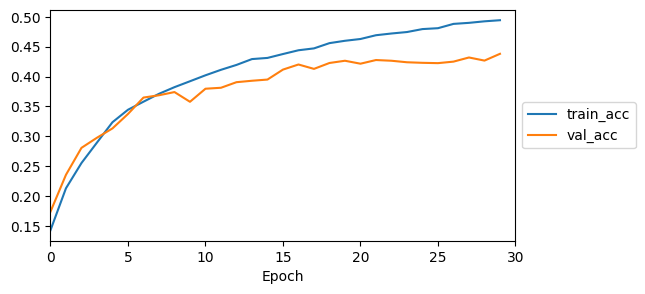

In [ ]:
pd.DataFrame(history_l1l2.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# Evaluate model on test set

y_pred_l1l2 = model_l1l2.predict(X_test)
y_pred_l1l2 = np.argmax(y_pred_l1l2, axis=1)
acc_l1l2 = tf.keras.metrics.Accuracy()(y_test, y_pred_l1l2).numpy()
print('Model accuracy with L1 L2 regularization:', acc_l1l2)

313/313 [==============================] - 1s 3ms/step
Model accuracy with L1 L2 regularization: 0.4314


Although the accuracy is low as compared to the base model, training for more epochs will increase it. But L1 and L2 regularization penalizes the weights, thereby reducing overfitting giving good generalization capabilties to unseen data.

### Dropout

In [ ]:
model_dropout = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_dropout.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_dropout = model_dropout.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), batch_size=batch_size)

Epoch 1/30
1329/1329 [==============================] - 11s 7ms/step - loss: 2.6007 - accuracy: 0.1851 - val_loss: 2.3260 - val_accuracy: 0.2781
Epoch 2/30
1329/1329 [==============================] - 8s 6ms/step - loss: 2.2851 - accuracy: 0.2884 - val_loss: 2.1011 - val_accuracy: 0.3536
Epoch 3/30
1329/1329 [==============================] - 8s 6ms/step - loss: 2.1107 - accuracy: 0.3453 - val_loss: 2.0308 - val_accuracy: 0.3808
Epoch 4/30
1329/1329 [==============================] - 9s 6ms/step - loss: 1.9969 - accuracy: 0.3820 - val_loss: 1.9478 - val_accuracy: 0.4001
Epoch 5/30
1329/1329 [==============================] - 8s 6ms/step - loss: 1.9015 - accuracy: 0.4117 - val_loss: 1.8192 - val_accuracy: 0.4380
Epoch 6/30
1329/1329 [==============================] - 8s 6ms/step - loss: 1.8260 - accuracy: 0.4336 - val_loss: 1.8261 - val_accuracy: 0.4341
Epoch 7/30
1329/1329 [==============================] - 9s 6ms/step - loss: 1.7690 - accuracy: 0.4491 - val_loss: 1.7539 - val_accuracy

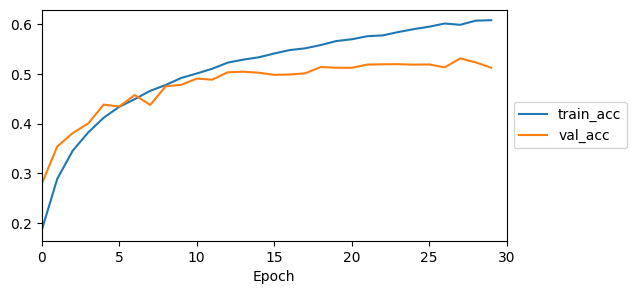

In [ ]:
pd.DataFrame(history_dropout.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# Evaluate model on test set

y_pred_dropout = model_dropout.predict(X_test)
y_pred_dropout = np.argmax(y_pred_dropout, axis=1)
acc_dropout = tf.keras.metrics.Accuracy()(y_test, y_pred_dropout).numpy()
print('Model accuracy with Dropout:', acc_dropout)

313/313 [==============================] - 1s 2ms/step
Model accuracy with Dropout: 0.5272


Although the accuracy is low as compared to the base model, training for more epochs will increase it. But dropout shows significant gain in performance on unseen data as the overfitting is reduced. Moreover, the test accuracy also increased as compared to usnig L1 L2 regularization.

### Early Stopping

In [ ]:
model_es = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_es.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Early stopping
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=1)

# Train model
history_es = model_es.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=batch_size, callbacks=[early_stopping_cb])

Epoch 1/10
1329/1329 [==============================] - 12s 7ms/step - loss: 2.5077 - accuracy: 0.2156 - val_loss: 2.3433 - val_accuracy: 0.2673
Epoch 2/10
1329/1329 [==============================] - 7s 5ms/step - loss: 2.0684 - accuracy: 0.3597 - val_loss: 1.9537 - val_accuracy: 0.3913
Epoch 3/10
1329/1329 [==============================] - 7s 6ms/step - loss: 1.8200 - accuracy: 0.4305 - val_loss: 1.8524 - val_accuracy: 0.4228
Epoch 4/10
1329/1329 [==============================] - 7s 5ms/step - loss: 1.6378 - accuracy: 0.4857 - val_loss: 1.7258 - val_accuracy: 0.4704
Epoch 5/10
1329/1329 [==============================] - 7s 5ms/step - loss: 1.4735 - accuracy: 0.5348 - val_loss: 1.7013 - val_accuracy: 0.4781
Epoch 6/10
1329/1329 [==============================] - 7s 5ms/step - loss: 1.3323 - accuracy: 0.5786 - val_loss: 1.7082 - val_accuracy: 0.4816


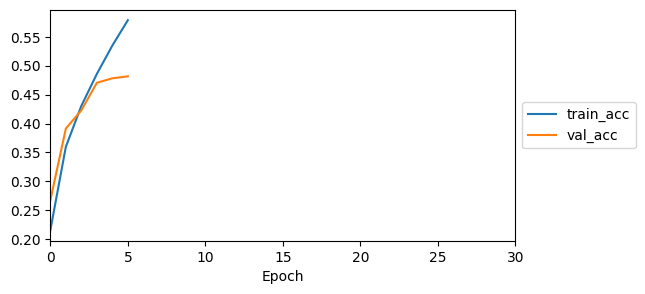

In [ ]:
pd.DataFrame(history_es.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# Evaluate model on test set

y_pred_es = model_es.predict(X_test)
y_pred_es = np.argmax(y_pred_es, axis=1)
acc_es = tf.keras.metrics.Accuracy()(y_test, y_pred_es).numpy()
print('Model accuracy with early stopping:', acc_es)

313/313 [==============================] - 1s 2ms/step
Model accuracy with early stopping: 0.4896


Early stopping stopped model training after 6th iteration because validation_loss increased by 0.0069 (instead of decreasing) and hence the early call back was triggered.

### Monte Carlo Dropout

In [ ]:
model_mc = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Lambda(lambda x: tf.keras.backend.expand_dims(x, axis=1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Lambda(lambda x: tf.keras.backend.expand_dims(x, axis=1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_mc.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_mc = model_mc.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), batch_size=batch_size)

Epoch 1/30
1329/1329 [==============================] - 12s 8ms/step - loss: 2.5639 - accuracy: 0.0549 - val_loss: 2.3214 - val_accuracy: 0.0572
Epoch 2/30
1329/1329 [==============================] - 9s 7ms/step - loss: 2.1880 - accuracy: 0.0585 - val_loss: 2.0433 - val_accuracy: 0.0597
Epoch 3/30
1329/1329 [==============================] - 10s 7ms/step - loss: 1.9864 - accuracy: 0.0609 - val_loss: 2.0231 - val_accuracy: 0.0609
Epoch 4/30
1329/1329 [==============================] - 9s 7ms/step - loss: 1.8383 - accuracy: 0.0620 - val_loss: 1.8491 - val_accuracy: 0.0624
Epoch 5/30
1329/1329 [==============================] - 10s 7ms/step - loss: 1.7028 - accuracy: 0.0635 - val_loss: 1.7923 - val_accuracy: 0.0621
Epoch 6/30
1329/1329 [==============================] - 10s 7ms/step - loss: 1.5880 - accuracy: 0.0638 - val_loss: 1.7584 - val_accuracy: 0.0628
Epoch 7/30
1329/1329 [==============================] - 9s 7ms/step - loss: 1.4827 - accuracy: 0.0648 - val_loss: 1.7036 - val_accur

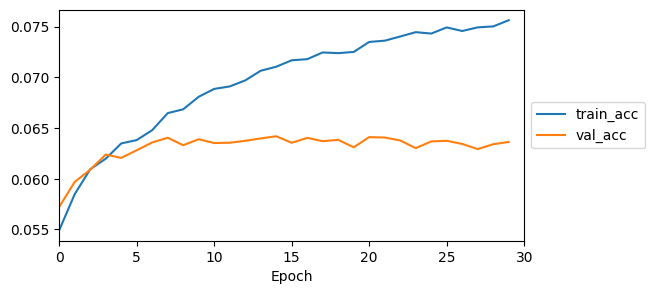

In [ ]:
pd.DataFrame(history_mc.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# Define Monte Carlo Dropout function
def monte_carlo_dropout(model, X, n=50):
    y_prob = []
    for i in range(n):
        y_prob.append(model.predict(X))
    y_prob = tf.stack(y_prob, axis=0)
    y_prob = tf.reduce_mean(y_prob, axis=0)
    y_pred = tf.argmax(y_prob, axis=1)
    return y_pred

# Evaluate model with Monte Carlo Dropout
sample_indices = np.random.choice(X_test.shape[0], size=1000, replace=False)
X_test_sample = X_test[sample_indices]
y_test_sample = y_test[sample_indices]

y_pred_mc = monte_carlo_dropout(model_mc, X_test_sample)
y_pred_mc = tf.squeeze(y_pred_mc)
y_pred_mc = np.argmax(y_pred_mc, axis=1)
acc_mc = tf.keras.metrics.Accuracy()(y_test_sample, y_pred_mc).numpy()
print('Accuracy with Monte Carlo Dropout:', acc_mc)

32/32 [==============================] - 0s 4ms/step
Accuracy with Monte Carlo Dropout: 0.06


### Batch Normalization

In [ ]:
model_bn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_bn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_bn = model_bn.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), batch_size=batch_size)

Epoch 1/30
1329/1329 [==============================] - 15s 8ms/step - loss: 2.2038 - accuracy: 0.3228 - val_loss: 2.1316 - val_accuracy: 0.3677
Epoch 2/30
1329/1329 [==============================] - 10s 8ms/step - loss: 1.7580 - accuracy: 0.4486 - val_loss: 1.9415 - val_accuracy: 0.3911
Epoch 3/30
1329/1329 [==============================] - 10s 8ms/step - loss: 1.5453 - accuracy: 0.5128 - val_loss: 1.7555 - val_accuracy: 0.4673
Epoch 4/30
1329/1329 [==============================] - 10s 8ms/step - loss: 1.3567 - accuracy: 0.5721 - val_loss: 1.5906 - val_accuracy: 0.5152
Epoch 5/30
1329/1329 [==============================] - 10s 7ms/step - loss: 1.1767 - accuracy: 0.6269 - val_loss: 2.0078 - val_accuracy: 0.4400
Epoch 6/30
1329/1329 [==============================] - 10s 7ms/step - loss: 1.0139 - accuracy: 0.6751 - val_loss: 1.9436 - val_accuracy: 0.4719
Epoch 7/30
1329/1329 [==============================] - 11s 9ms/step - loss: 0.8485 - accuracy: 0.7241 - val_loss: 1.7676 - val_ac

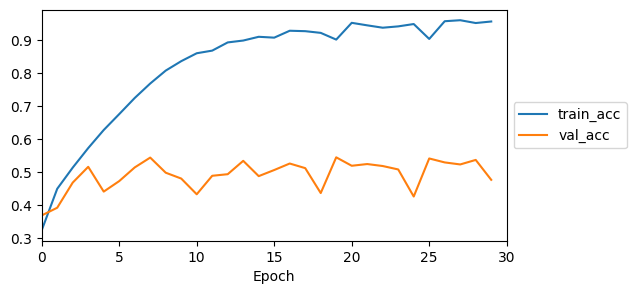

In [ ]:
pd.DataFrame(history_bn.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# Evaluate model on test set

y_pred_bn = model_bn.predict(X_test)
y_pred_bn = np.argmax(y_pred_bn, axis=1)
acc_bn = tf.keras.metrics.Accuracy()(y_test, y_pred_bn).numpy()
print('Model accuracy with batch normalization:', acc_bn)

313/313 [==============================] - 1s 3ms/step
Model accuracy with batch normalization: 0.4779


Adding batch normalization layers reduced the validation set accuracy significantly as compared to the training accuracy (overfitting might be occuring in this case).

### Custom dropout

In [ ]:
class CustomDropout(tf.keras.layers.Layer):
    def __init__(self, rate):
      super(CustomDropout, self).__init__()
      self.rate = rate
        
    def call(self, inputs, training=None):
      if training:
        mask = tf.random.uniform(shape=tf.shape(inputs), minval=0.0, maxval=1.0) >= self.rate
        mask = tf.cast(mask, dtype=inputs.dtype)
        output = inputs * mask
      else:
        output = inputs
        
      return output

In [ ]:
model_custom_dropout = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    CustomDropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    CustomDropout(0.2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    CustomDropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    CustomDropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    CustomDropout(0.2),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_custom_dropout.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_custom_dropout = model_custom_dropout.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), batch_size=batch_size)

Epoch 1/30
1329/1329 [==============================] - 10s 6ms/step - loss: 2.6579 - accuracy: 0.1634 - val_loss: 2.8793 - val_accuracy: 0.2392
Epoch 2/30
1329/1329 [==============================] - 7s 5ms/step - loss: 2.3523 - accuracy: 0.2709 - val_loss: 2.5651 - val_accuracy: 0.3253
Epoch 3/30
1329/1329 [==============================] - 8s 6ms/step - loss: 2.1885 - accuracy: 0.3243 - val_loss: 2.7937 - val_accuracy: 0.3549
Epoch 4/30
1329/1329 [==============================] - 7s 5ms/step - loss: 2.0647 - accuracy: 0.3620 - val_loss: 2.7591 - val_accuracy: 0.3597
Epoch 5/30
1329/1329 [==============================] - 8s 6ms/step - loss: 1.9724 - accuracy: 0.3894 - val_loss: 2.3982 - val_accuracy: 0.4181
Epoch 6/30
1329/1329 [==============================] - 8s 6ms/step - loss: 1.8995 - accuracy: 0.4123 - val_loss: 2.3784 - val_accuracy: 0.4188
Epoch 7/30
1329/1329 [==============================] - 7s 5ms/step - loss: 1.8302 - accuracy: 0.4349 - val_loss: 2.2807 - val_accuracy

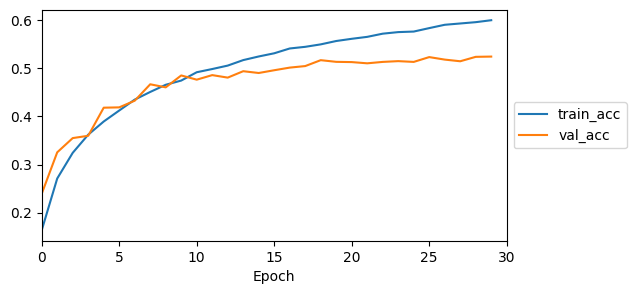

In [ ]:
pd.DataFrame(history_custom_dropout.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# Evaluate model on test set

y_pred_custom_dropout = model_custom_dropout.predict(X_test)
y_pred_custom_dropout = np.argmax(y_pred_custom_dropout, axis=1)
acc_custom_dropout = tf.keras.metrics.Accuracy()(y_test, y_pred_custom_dropout).numpy()
print('Model accuracy with custom dropout:', acc_custom_dropout)

313/313 [==============================] - 1s 3ms/step
Model accuracy with custom dropout: 0.5323


Custom dropout works similar to keras.dropout layer. The network is not overfitting and higher accuracy can be achieved if trained for more epochs

### Custom regularization

In [ ]:
def custom_regularizer(weight_matrix):
    return tf.reduce_sum(tf.abs(tf.square(weight_matrix))) * 0.001

In [ ]:
model_custom_reg = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=custom_regularizer),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=custom_regularizer),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=custom_regularizer),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile model
model_custom_reg.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_custom_reg = model_custom_reg.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), batch_size=batch_size)

Epoch 1/30
1329/1329 [==============================] - 10s 6ms/step - loss: 2.6336 - accuracy: 0.1835 - val_loss: 2.4064 - val_accuracy: 0.2512
Epoch 2/30
1329/1329 [==============================] - 8s 6ms/step - loss: 2.3052 - accuracy: 0.2954 - val_loss: 2.1773 - val_accuracy: 0.3363
Epoch 3/30
1329/1329 [==============================] - 7s 5ms/step - loss: 2.1055 - accuracy: 0.3607 - val_loss: 2.0629 - val_accuracy: 0.3759
Epoch 4/30
1329/1329 [==============================] - 8s 6ms/step - loss: 1.9722 - accuracy: 0.4047 - val_loss: 2.0079 - val_accuracy: 0.4001
Epoch 5/30
1329/1329 [==============================] - 8s 6ms/step - loss: 1.8630 - accuracy: 0.4404 - val_loss: 1.9385 - val_accuracy: 0.4233
Epoch 6/30
1329/1329 [==============================] - 7s 5ms/step - loss: 1.7782 - accuracy: 0.4725 - val_loss: 1.8773 - val_accuracy: 0.4447
Epoch 7/30
1329/1329 [==============================] - 8s 6ms/step - loss: 1.7011 - accuracy: 0.4988 - val_loss: 1.8741 - val_accuracy

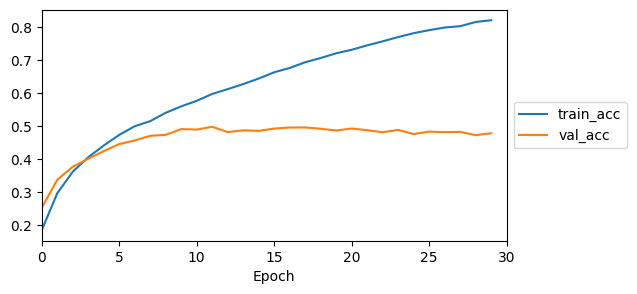

In [ ]:
pd.DataFrame(history_custom_reg.history)[['accuracy', 'val_accuracy']].rename(columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'}).plot(figsize=(6, 3), xlim=[0, num_epochs], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# Evaluate model on test set

y_pred_custom_reg = model_custom_reg.predict(X_test)
y_pred_custom_reg = np.argmax(y_pred_custom_reg, axis=1)
acc_custom_reg = tf.keras.metrics.Accuracy()(y_test, y_pred_custom_reg).numpy()
print('Model accuracy with custom regularization:', acc_custom_reg)

313/313 [==============================] - 1s 2ms/step
Model accuracy with custom regularization: 0.4686


Custom regularizer -  calculates the sum of the absolute values of the squared weight matrix, multiplied by a constant value of 0.001. This custom regularizer does not perform as well as other regularization techniques.